# http://karpov.courses

In [11]:
# imports for the whole notebook
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from io import BytesIO

Настало время последнего мини-проекта в блоке Python! В нём вы поработаете с API и узнаете, как ведут себя пользователи на сайте Яндекс.Метрики.

Так как мы работаем с демо данными Яндекс.Метрики, нам позволено видеть данные только за последнюю неделю. Это требует обновления заданий и ответов на них каждую неделю, что не очень удобно и вам, и нам. Поэтому для удобства проверки мы решили немного модифицировать степы: теперь для того, чтобы ответить на вопросы, вам необходимо поработать с уже выгруженными датасетами из Яндекс.Метрики. Но вы можете самостоятельно повторить каждый из запросов в задании к реальному API Яндекс.Метрики, чтобы потренироваться и получить данные в таком же формате, как в прикрепленном к задаче датасете.

Удачи!

### Задание 1
Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. 

Данные - step_1_lesson_7.csv

In [32]:
df = pd.read_csv('miniproject_data/step_1_lesson_7.csv')
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

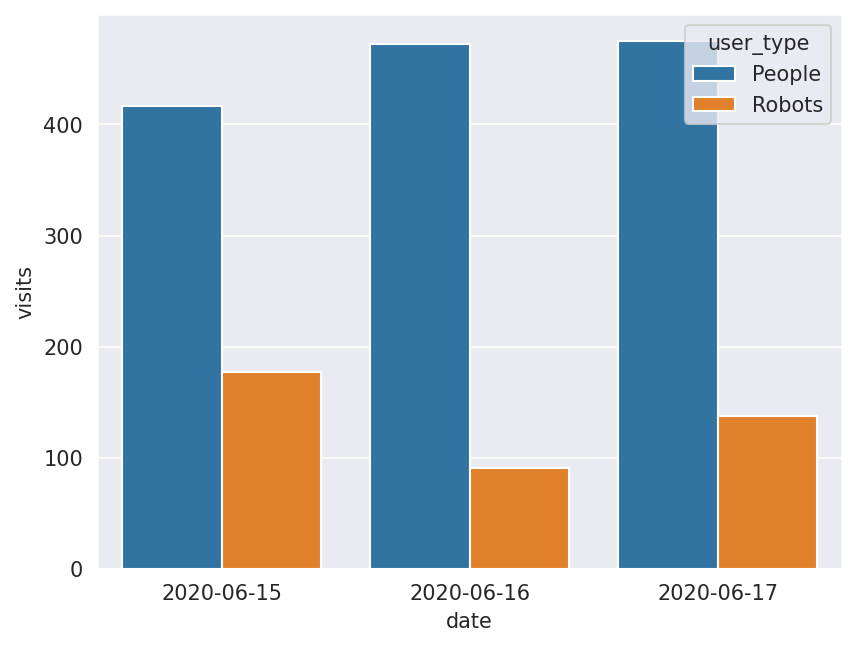

In [10]:
fig = plt.figure(dpi=150)
# You can also use the axes_style() function in a with statement
# to temporarily set plot parameters.
# This also allows you to make figures with differently-styled axes
with sns.axes_style(style="darkgrid"):
    ax = fig.add_subplot()
    sns.barplot(data=df, x='date', y='visits', hue='user_type', errorbar=None, ax=ax);

### Задание 2
Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные - step_2_lesson_7.csv.

Ответ округлите до целого.

In [12]:
df = pd.read_csv('miniproject_data/step_2_lesson_7.csv')
df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [25]:
df['%_of_all_visits'] = np.round(100*df['visits'] / df['visits'].sum())
df.head()

,date,browser,visits,%_of_all_visits
0,2020-06-15,Google Chrome,354.0,60.0
1,2020-06-15,Firefox,58.0,10.0
2,2020-06-15,Yandex Browser,54.0,9.0
3,2020-06-15,Safari,41.0,7.0
4,2020-06-15,Chrome Mobile,31.0,5.0


In [30]:
# weird looking, but works
google_chrome_percent = df[df['browser'] ==
                           'Google Chrome']['%_of_all_visits'].sum()
google_chrome_percent

60.0

### Задание 3
Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?


In [53]:
df = pd.read_csv('miniproject_data/step_3_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [54]:
temp = df.groupby(by=['browser', 'user_type'], as_index=False) \
    .agg({'visits': 'sum'})
temp.head()

,browser,user_type,visits
0,Android Browser,People,1.0
1,Chrome Mobile,People,31.0
2,Chromium,People,1.0
3,Chromium,Robots,1.0
4,CocCoc,People,1.0


In [61]:
user_browser = pd.pivot(data=temp, columns='user_type',
                        index='browser', values='visits').fillna(0)
# create column with ratio of bots to total N of users (per browser)
user_browser['Robots_2_total'] = user_browser['Robots'] / \
    (user_browser['People'] + user_browser['Robots'])
# sort by this result
user_browser = user_browser.sort_values(
    by='Robots_2_total', ascending=False)
user_browser.head(3)

user_type,People,Robots,Robots_2_total
browser,,,
UCWEB,0.0,4.0,1.000000
Safari,19.0,22.0,0.536585
Firefox,27.0,31.0,0.534483


### Задание 4
Выгрузите данные step_4_lesson_7.csv, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [2]:
df = pd.read_csv('miniproject_data/step_4_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [7]:
temp = df.groupby(by=['browser', 'user_type'], as_index=False) \
    .agg({'visits': 'sum'})
temp['% of total visits'] = (100*temp['visits'] / temp['visits'].sum()).round(1)
temp.head()

,browser,user_type,visits,% of total visits
0,Android Browser,People,1.0,0.2
1,Chrome Mobile,People,31.0,5.2
2,Chromium,People,1.0,0.2
3,Chromium,Robots,1.0,0.2
4,CocCoc,People,1.0,0.2


In [10]:
temp.query("browser=='Safari' & user_type=='People'")

,browser,user_type,visits,% of total visits
15,Safari,People,19.0,3.2


### Задание 5
⭐️Задание со звёздочкой!⭐️

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [18]:
my_req = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = my_req.content

df_external = pd.read_csv(BytesIO(data))
df_external.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [19]:
df_internal = pd.read_csv('miniproject_data/step_3_lesson_7.csv')
df_internal.head()
# Note: different last comlumns (users and visits)

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [20]:
df_merged = pd.merge(left=df_internal, right=df_external, how='inner',
                     on=['date', 'browser', 'user_type'])
df_merged.head()

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0


In [25]:
df_merged = df_merged.assign(
    visits_to_users = (df_merged['visits'] / df_merged['users']).round(),)
df_merged.head()

,date,browser,user_type,visits,users,visits_to_users
0,2020-06-15,Google Chrome,People,250.0,240.0,1.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.0
3,2020-06-15,Firefox,Robots,31.0,29.0,1.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.0


In [27]:
df_merged.query("browser=='Google Chrome' and user_type=='Robots'")

,date,browser,user_type,visits,users,visits_to_users
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0


### Дополнительный проект
В рамках дополнительного проекта попробуем освоить API, позволяющий получать данные о музейных коллекциях. Это задание может пригодиться для большего понимания того, какими способами можно собирать и обрабатывать данные, например, для собственного проекта или другой рабочей задачи.

#### Описание API
Документация: https://metmuseum.github.io

Ключ: для использования выбранного API ключ не требуется.

Всего есть 4 основных раздела:
* Objects: A listing of all valid Object IDs available for access.
* Object: A record for an object, containing all open access data about that object, including its image (if the image is available under Open Access)
* Departments: A listing of all valid departments, with their department ID and the department display name
* Search: A listing of all Object IDs for objects that contain the search query within the object’s data

In [41]:
base_url = r'https://collectionapi.metmuseum.org/public/collection/v1/'
search_endpoint = r'search?'
object_endpoint = r'objects/'

#### Задание 1
Найти все произведения, связанные с подсолнухами. Выполните поиск по слову "sunflowers". Внимательно посмотрите на формат ответа и сохраните id полученных объектов в список sunflower_ids.

In [33]:
my_req = requests.get(url=base_url+search_endpoint, params={'q': 'sunflowers'})
my_req

<Response [200]>

In [35]:
# Content of the response, in unicode.
my_req.text

'{"total":93,"objectIDs":[436524,484935,437112,210191,431264,397949,656530,480725,486590,485308,375281,705155,11922,343052,20141,347980,208554,403496,360837,207869,437115,400581,423400,707887,223828,682927,57922,79739,193938,649813,339347,208218,202228,437984,761604,696949,704667,822589,822590,437329,363282,207753,822570,816522,487043,436252,203893,436580,367434,190739,2032,423237,262423,839296,437526,367817,13644,18362,820022,648617,761731,814626,892559,207967,626832,2019,701016,262430,262428,841928,262378,707697,205386,426804,436535,633526,369073,747779,436529,436121,852414,427872,895564,436144,436530,436534,724844,437980,396836,631808,834765,834580,834585]}'

In [36]:
# Returns the json-encoded content of a response, if any
data = my_req.json()

In [38]:
sunflower_ids = data['objectIDs']
type(sunflower_ids)

list

In [40]:
required_ids = [20149, 437329, 16822570, 2032, 436524]
for id in required_ids:
    print(f"Is {id} is in the list? {id in sunflower_ids}")

Is 20149 is in the list? False
Is 437329 is in the list? True
Is 16822570 is in the list? False
Is 2032 is in the list? True
Is 436524 is in the list? True


#### Задание 2
Отлично! На предыдущем шаге мы получили результаты поиска. Следущий этап – собрать информацию об этих объектах.

Выполните запрос для объекта 437980.

In [43]:
my_req = requests.get(url=base_url+object_endpoint+'437980')
my_req

<Response [200]>

In [ ]:
# Returns the json-encoded content of a response, if any
data = my_req.json()
data

In [45]:
required_fields = ['artistDisplayName', 'title', 'culture', 'objectName',
                   'objectID', 'department']

for field in required_fields:
        print(f'{field}: {data[field]}')

artistDisplayName: Vincent van Gogh
title: Cypresses
culture: 
objectName: Painting
objectID: 437980
department: European Paintings


#### Задание 3
Теперь напишите цикл, с помощью которого будет собрана информация об объектах, которые были получены на 2 шаге. Запишите в DataFrame следующие параметры:
* objectID – id объекта
* title – название
* artistDisplayName – автор
* department – департамент
* objectBeginDate – дата (начало)
* objectEndDate – дата (конец)
* period – название периода
* objectName – название/категория объекта
* culture – культура

Сколько объектов относятся к японской культуре? (culture – Japan)

In [64]:
sunflower_dict = {'objectID':[], 'title':[], 'artistDisplayName': [],
                  'department': [], 'objectBeginDate': [], 'objectEndDate': [],
                  'period': [], 'objectName': [], 'culture': []}
sunflower_dict

{'objectID': [],
 'title': [],
 'artistDisplayName': [],
 'department': [],
 'objectBeginDate': [],
 'objectEndDate': [],
 'period': [],
 'objectName': [],
 'culture': []}

In [65]:
for sun_id in sunflower_ids:
    cur_req = requests.get(url=base_url+object_endpoint+str(sun_id))
    cur_data = cur_req.json()
    for key in sunflower_dict.keys():
        try:
            sunflower_dict[key].append(cur_data[key])
        except KeyError:
            print('Somethings is wrong with {}!'.format(sun_id))
            # continue

# sunflower_dict

Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 696949!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 704667!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 839296!
Somethings is wrong with 841928!
Somethings is wrong with 841928!
Somethings is wrong with 841928!
Somethings

In [66]:
sunflower_df = pd.DataFrame(data=sunflower_dict)
sunflower_df.head()

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,436524,Sunflowers,Vincent van Gogh,European Paintings,1887,1887,,Painting,
1,484935,Sunflowers,Edward McKnight Kauffer,Modern and Contemporary Art,1921,1921,,Painting,
2,437112,Bouquet of Sunflowers,Claude Monet,European Paintings,1881,1881,,Painting,
3,210191,Vase with sunflowers,Rozenburg Plateelfabriek,European Sculpture and Decorative Arts,1896,1896,,Vase,
4,431264,Sunflowers,Lily Converse,Drawings and Prints,1941,1941,,Print,
...,...,...,...,...,...,...,...,...,...
83,437980,Cypresses,Vincent van Gogh,European Paintings,1889,1889,,Painting,
84,396836,The Aesthetic Craze,Currier & Ives,Drawings and Prints,1882,1882,,Print,
85,834765,"A Child's Garden, from ""Picture Poesies""",Arthur Boyd Houghton,Drawings and Prints,1865,1874,,Print,
86,834580,"A Life in a Year–The Garden–Noon, from ""Pictur...",Arthur Boyd Houghton,Drawings and Prints,1866,1874,,Print,


In [68]:
n_japan = ((sunflower_df['culture']=='Japan').sum())
n_japan

1

#### Задание 4
Теперь попробуем построить более сложный запрос с помощью секции "Search"! На этот раз параметры необходимо передать через "&", например, departmentId (id департамента – 1) и q (ключевое слово – cat):

r =requests.get('https://collectionapi.metmuseum.org/public/collection/v1/search?departmentId=1&q=cat')
<br>cats = r.json()


Выполните поисковый запрос для департамента "Asian art" (departmentId = 6) с тегом "cat" и запишите id объектов в cat_ids. Используйте цикл из шага 4, чтобы получить данные о первой 1000 объектов из списка.

Note: выполнение цикла может занять некоторое время (~5 минут), поэтому проверять его работоспособность лучше на более маленькой выборке!

В качестве ответа укажите, в каком периоде (period) было выполнено наибольшее количество работ, представленных в музее?

In [81]:
my_req = requests.get(url=base_url+search_endpoint, params={'departmentId': 6,
                                                            'q': 'cat'})
my_req

<Response [200]>

In [82]:
cats_ids = my_req.json()['objectIDs']
# cats_ids

cats_dict = {'objectID': [], 'title': [], 'artistDisplayName': [],
             'department': [], 'objectBeginDate': [], 'objectEndDate': [],
             'period': [], 'objectName': [], 'culture': []}
cats_dict

{'objectID': [],
 'title': [],
 'artistDisplayName': [],
 'department': [],
 'objectBeginDate': [],
 'objectEndDate': [],
 'period': [],
 'objectName': [],
 'culture': []}

In [83]:
for i in range(1000):
    cur_req = requests.get(url=base_url+object_endpoint+str(cats_ids[i]))
    cur_data = cur_req.json()
    for key in cats_dict.keys():
        try:
            cats_dict[key].append(cur_data[key])
        except KeyError:
            print('Somethings is wrong with {}!'.format(cats_ids[i]))

In [84]:
cats_df = pd.DataFrame(data=cats_dict)
cats_df.head()

,objectID,title,artistDisplayName,department,objectBeginDate,objectEndDate,period,objectName,culture
0,49698,Cat,Zhang Yuguang,Asian Art,1900,1968,,Folding fan mounted as an album leaf,China
1,49470,Cat,Wang Li,Asian Art,1813,1879,Qing dynasty (1644–1911),Hanging scroll,China
2,36221,Cat,Wang Yun,Asian Art,1900,1933,,Hanging scroll,China
3,53222,Musk Cat,Uto Gyoshi,Asian Art,1550,1599,Muromachi period (1392–1573),Hanging scroll,Japan
4,60873,Head ornament,,Asian Art,960,1279,Song dynasty (960–1279) or later,Head ornament,China


In [90]:
cats_df['period'].value_counts().head(1)

period
Edo period (1615–1868)    275
Name: count, dtype: int64